In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
plt.style.use('fivethirtyeight')

In [61]:
states = np.load('Data/States.npy')
diffs = np.load('Data/diffs.npy')

## Informedness

In [62]:
h1_game_costs = []
h2_game_costs = []
h3_game_costs = []
h1_m_game_costs = []
for state in states:
    h1_game_costs.append(h.h1(state))
    h2_game_costs.append(h.h2(state))
    h3_game_costs.append(h.h3(state))
    h1_m_game_costs.append(h.h1_mod(state))

In [63]:
informed = pd.DataFrame(list(zip(h1_game_costs, h2_game_costs, h3_game_costs, 
                                h1_m_game_costs)), 
                        columns = ['h1', 'h2', 'h3', 'h2_m'])
informed['Difficulty'] = [diffs[i % len(diffs)] for i in range(len(states))]

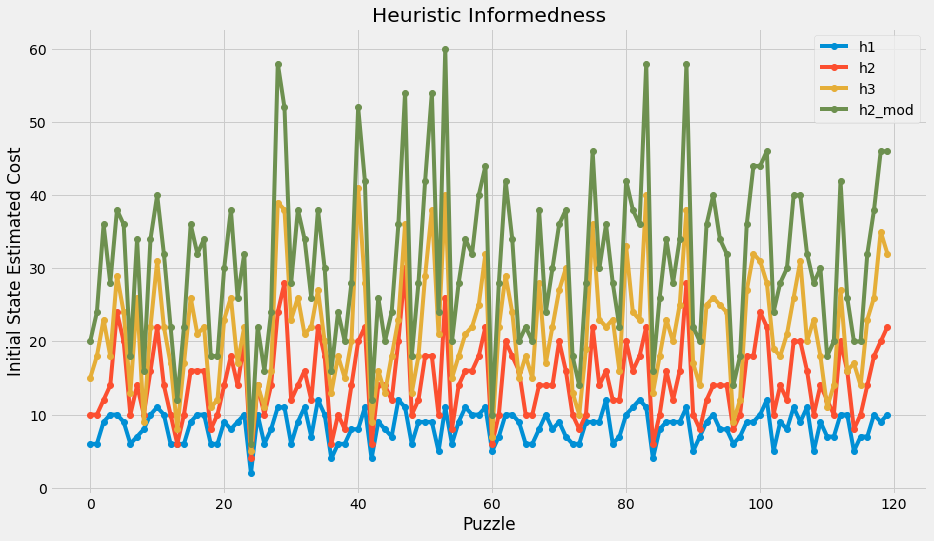

In [64]:
plt.figure(figsize=(14, 8))
plt.title('Heuristic Informedness')
plt.xlabel('Puzzle')
plt.ylabel('Initial State Estimated Cost')
p1 = plt.plot(informed.index, informed.h1, '-o', label='h1')
p2 = plt.plot(informed.index, informed.h2, '-o', label='h2')
p3 = plt.plot(informed.index, informed.h3, '-o', label='h3')
p3 = plt.plot(informed.index, informed.h2_m, '-o', label='h2_mod')
plt.legend()
plt.show()

## AStar vs BestFirst

### Scatter plot - Search Length vs Solution Path Length

In [65]:
aS = []
bf = []
for idx in range(len(states)):
    as_df = pd.read_pickle('Data/Stats/h1/state_%d/as.pkl' % idx)
    bf_df = pd.read_pickle('Data/Stats/h1/state_%d/bf.pkl' % idx)
    aS.append([as_df.Searches[0], as_df.SolutionLength[0]-1])
    bf.append([bf_df.Searches[0], bf_df.SolutionLength[0]-1])

In [66]:
aS_df = pd.DataFrame(aS, columns = ['Searches', 'SolutionLength'])
bf_df = pd.DataFrame(bf, columns = ['Searches', 'SolutionLength'])

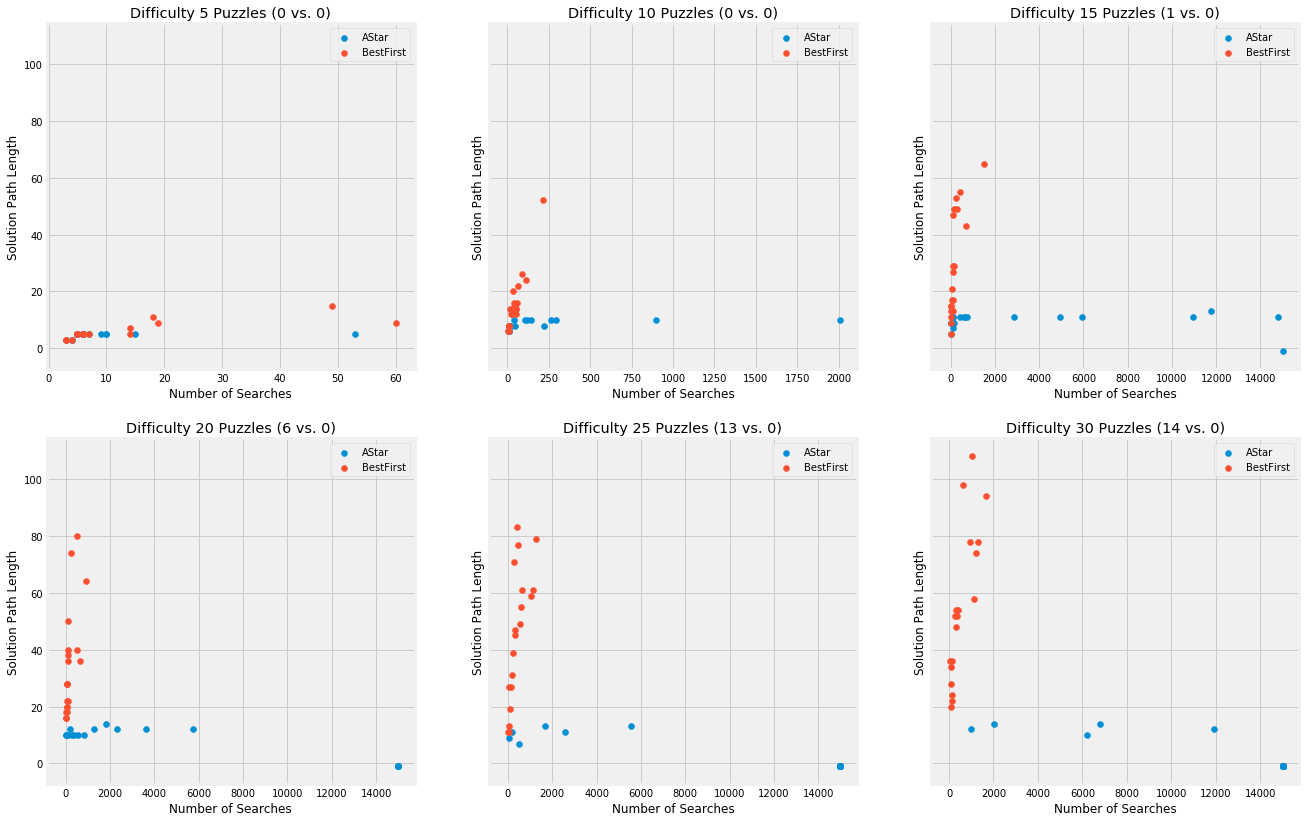

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 14))
ctr=0
for i in range(2):
    for j in range(3):
        idc = [idx for idx in range(len(states)-2) if idx % 6 == ctr]
        temp_as = aS_df.iloc[idc, :]
        temp_bf = bf_df.iloc[idc, :]
        ax[i , j].scatter(temp_as.Searches, temp_as.SolutionLength, label='AStar')
        ax[i , j].scatter(temp_bf.Searches, temp_bf.SolutionLength, label='BestFirst')
        ax[i, j].set_xlabel('Number of Searches')
        ax[i, j].set_ylabel('Solution Path Length')
        incomplete_as = temp_as[temp_as.Searches == 15000].shape[0]
        incomplete_bf = temp_bf[temp_bf.Searches == 15000].shape[0]
        ax[i, j].set_title('Difficulty %d Puzzles (%d vs. %d)' 
                           % (diffs[ctr], incomplete_as, incomplete_bf))
        ax[i, j].legend()
        ctr+=1

In [10]:
aS = []
bf = []
for idx in range(len(states)):
    as_df = pd.read_pickle('Data/Stats/h2/state_%d/as.pkl' % idx)
    bf_df = pd.read_pickle('Data/Stats/h2/state_%d/bf.pkl' % idx)
    aS.append([as_df.Searches[0], as_df.SolutionLength[0]-1])
    bf.append([bf_df.Searches[0], bf_df.SolutionLength[0]-1])

In [11]:
aS_df = pd.DataFrame(aS, columns = ['Searches', 'SolutionLength'])
bf_df = pd.DataFrame(bf, columns = ['Searches', 'SolutionLength'])

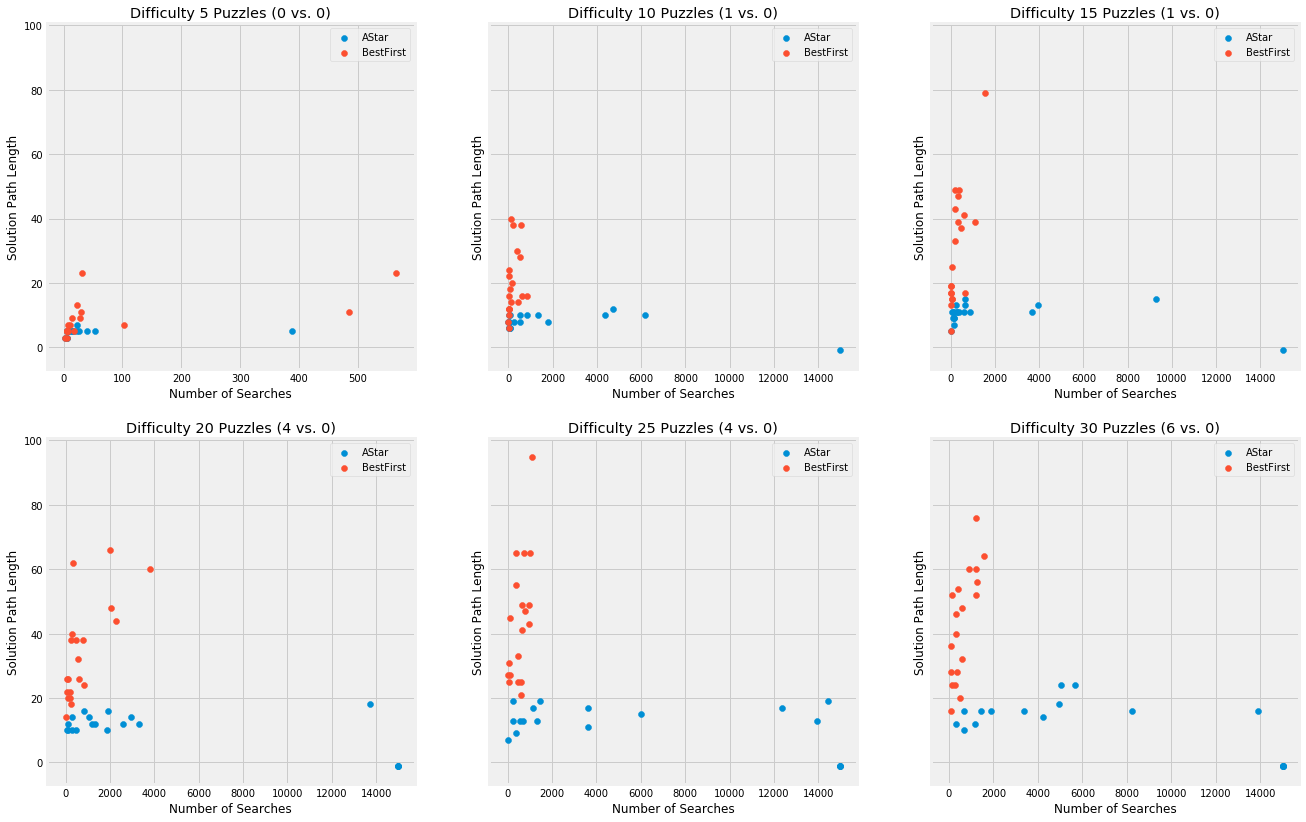

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 14))
ctr=0
for i in range(2):
    for j in range(3):
        idc = [idx for idx in range(len(states)-2) if idx % 6 == ctr]
        temp_as = aS_df.iloc[idc, :]
        temp_bf = bf_df.iloc[idc, :]
        ax[i , j].scatter(temp_as.Searches, temp_as.SolutionLength, label='AStar')
        ax[i , j].scatter(temp_bf.Searches, temp_bf.SolutionLength, label='BestFirst')
        ax[i, j].set_xlabel('Number of Searches')
        ax[i, j].set_ylabel('Solution Path Length')
        incomplete_as = temp_as[temp_as.Searches == 15000].shape[0]
        incomplete_bf = temp_bf[temp_bf.Searches == 15000].shape[0]
        ax[i, j].set_title('Difficulty %d Puzzles (%d vs. %d)' 
                           % (diffs[ctr], incomplete_as, incomplete_bf))
        ax[i, j].legend()
        ctr+=1

In [13]:
aS = []
bf = []
for idx in range(len(states)-2):
    as_df = pd.read_pickle('Data/Stats/h3/state_%d/as.pkl' % idx)
    bf_df = pd.read_pickle('Data/Stats/h3/state_%d/bf.pkl' % idx)
    aS.append([as_df.Searches[0], as_df.SolutionLength[0]-1])
    bf.append([bf_df.Searches[0], bf_df.SolutionLength[0]-1])

In [14]:
aS_df = pd.DataFrame(aS, columns = ['Searches', 'SolutionLength'])
bf_df = pd.DataFrame(bf, columns = ['Searches', 'SolutionLength'])

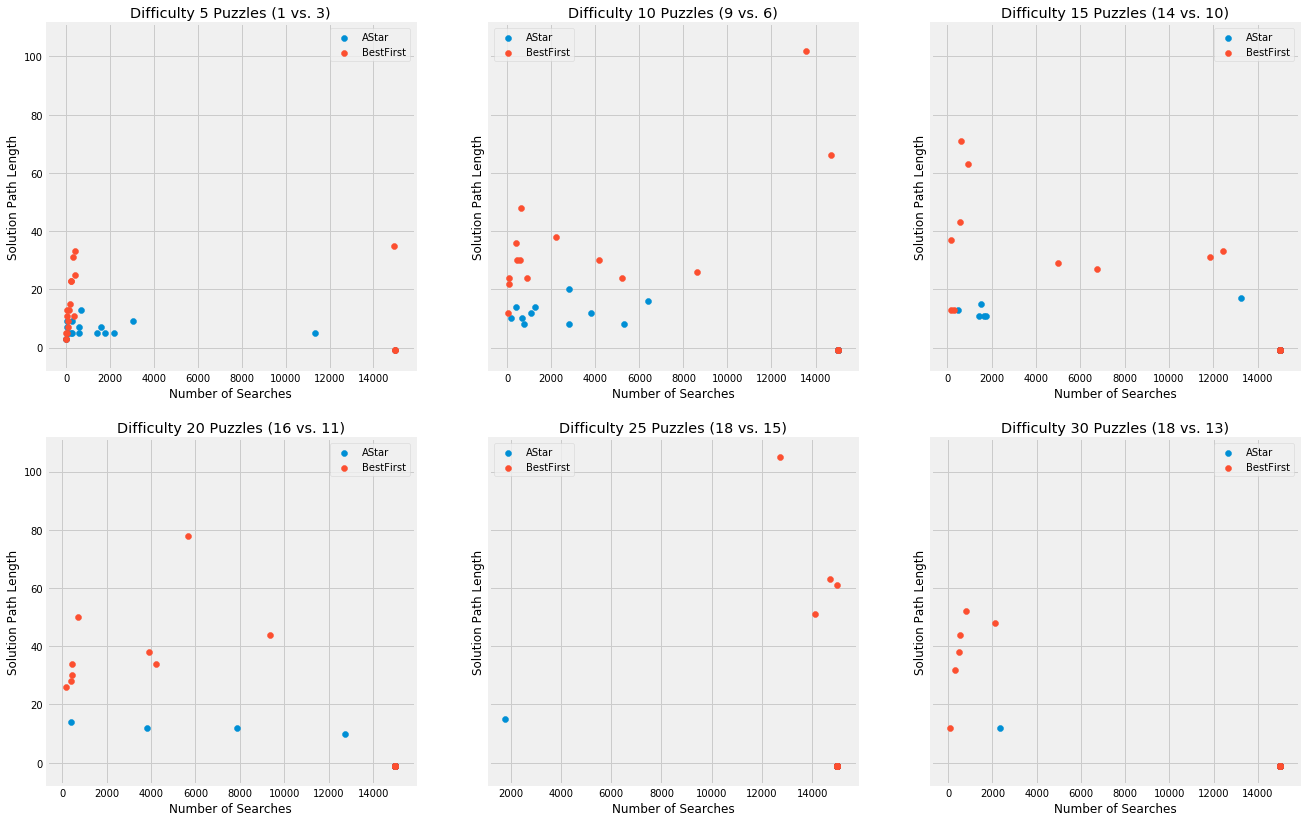

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 14))
ctr=0
for i in range(2):
    for j in range(3):
        idc = [idx for idx in range(len(states)-2) if idx % 6 == ctr]
        temp_as = aS_df.iloc[idc, :]
        temp_bf = bf_df.iloc[idc, :]
        ax[i , j].scatter(temp_as.Searches, temp_as.SolutionLength, label='AStar')
        ax[i , j].scatter(temp_bf.Searches, temp_bf.SolutionLength, label='BestFirst')
        ax[i, j].set_xlabel('Number of Searches')
        ax[i, j].set_ylabel('Solution Path Length')
        incomplete_as = temp_as[temp_as.Searches == 15000].shape[0]
        incomplete_bf = temp_bf[temp_bf.Searches == 15000].shape[0]
        ax[i, j].set_title('Difficulty %d Puzzles (%d vs. %d)' 
                           % (diffs[ctr], incomplete_as, incomplete_bf))
        ax[i, j].legend()
        ctr+=1

# BFS Analysis

In [16]:
num_nodes = []
depth = []
for file in os.listdir('Data/Stats/bfs')[:]:
    df = pd.read_pickle('Data/Stats/bfs/%s' % file)
    num_nodes.extend(df.NumNodes.values.tolist())
    depth.extend(df.Depth.values.tolist())

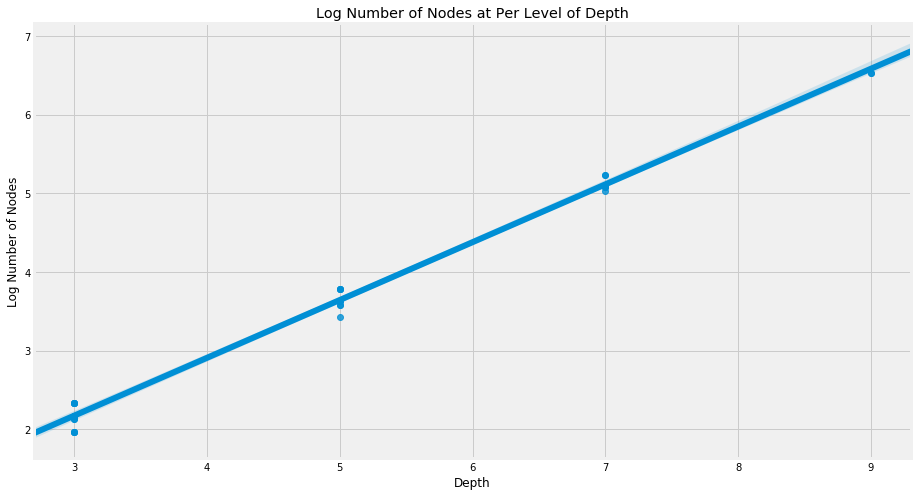

In [17]:
plt.figure(figsize=(14, 8))
plt.title('Log Number of Nodes at Per Level of Depth')
plt.xlabel('Depth')
plt.ylabel('Log Number of Nodes')
sns.regplot(np.array(depth), np.array(np.log10(num_nodes)), data=None)

## Time by Difficulty Analysis

In [18]:
stats = []
for file in os.listdir('Data/Stats/h2/')[0:20]:
    try:
        df_as = pd.read_pickle('Data/Stats/h2/%s/as.pkl' % file)
        stats.append([df_as.Difficulty.values[0], 
                      df_as.Time.values[0], 
                     'aS'])
        df_bf = pd.read_pickle('Data/Stats/h2/%s/bf.pkl' % file)
        stats.append([df_bf.Difficulty.values[0], 
                      df_bf.Time.values[0], 
                     'bf'])
    except:
        pass
    
for file in os.listdir('Data/Stats/bfs/')[0:20]:
    try:
        df = pd.read_pickle('Data/Stats/bfs/%s' % file)
        stats.append([df.Difficulty.values[0], 
                      df.Time.values[0], 
                     'dfs'])
    except Exception as e:
        pass

In [19]:
df = pd.DataFrame(stats, columns = ['Difficulty', 'Time', 'Algo'])

In [20]:
df = df[df.Time > 0]

In [21]:
df.Time = df.Time/1000

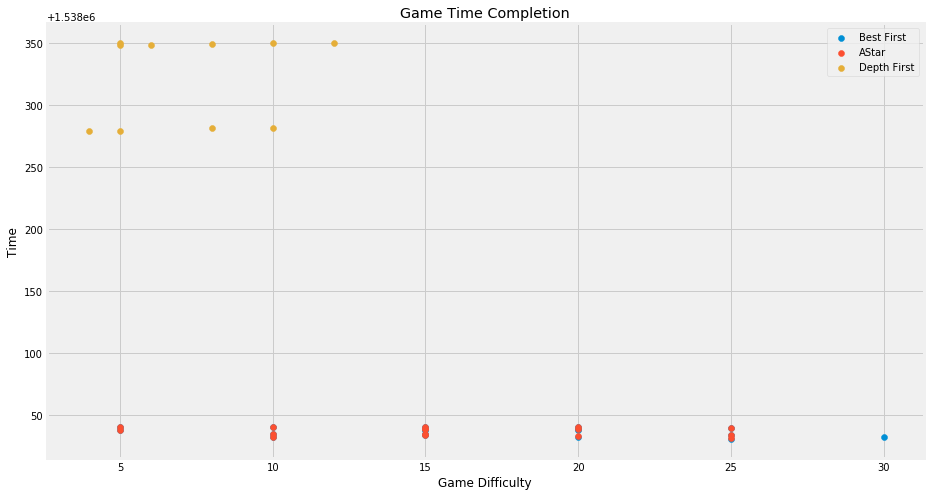

In [22]:
plt.figure(figsize=(14, 8))
plt.title('Game Time Completion')
plt.scatter(df[df.Algo=='bf'].Difficulty, 
         df[df.Algo=='bf'].Time, label='Best First')
plt.scatter(df[df.Algo=='aS'].Difficulty, 
         df[df.Algo=='aS'].Time, label='AStar')
plt.scatter(df[df.Algo=='dfs'].Difficulty, 
         df[df.Algo=='dfs'].Time, label='Depth First')
plt.legend()
plt.ylabel('Time')
plt.xlabel('Game Difficulty')
plt.show()

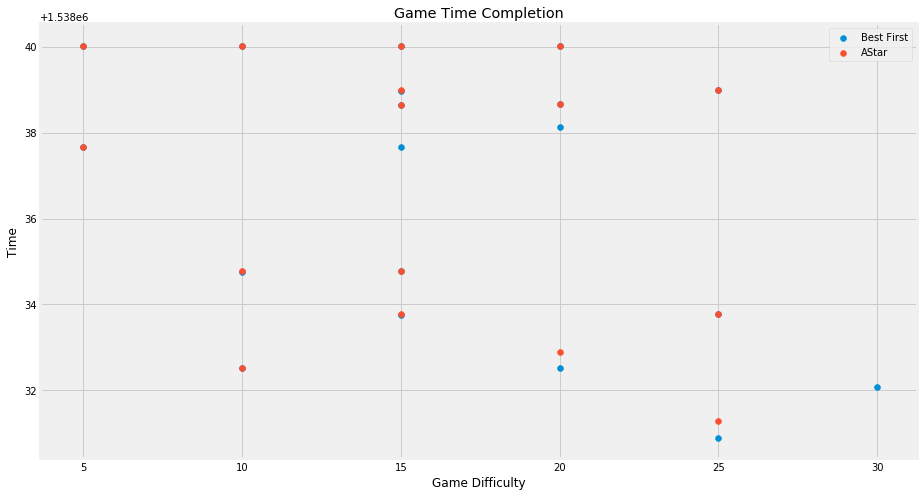

In [23]:
plt.figure(figsize=(14, 8))
plt.title('Game Time Completion')
plt.scatter(df[df.Algo=='bf'].Difficulty, 
         df[df.Algo=='bf'].Time, label='Best First')
plt.scatter(df[df.Algo=='aS'].Difficulty, 
         df[df.Algo=='aS'].Time, label='AStar')
plt.legend()
plt.ylabel('Time')
plt.xlabel('Game Difficulty')
plt.show()

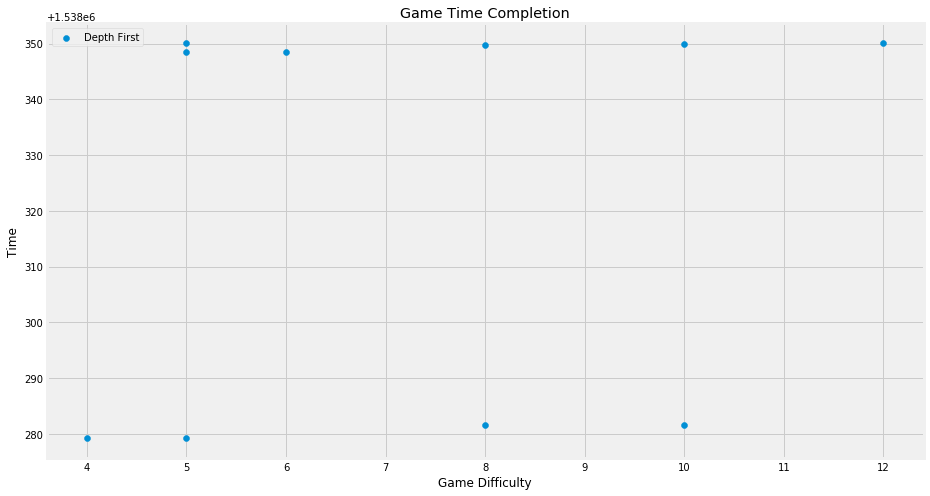

In [24]:
plt.figure(figsize=(14, 8))
plt.title('Game Time Completion')
plt.scatter(df[df.Algo=='dfs'].Difficulty, 
         df[df.Algo=='dfs'].Time, label='Depth First')
plt.legend()
plt.ylabel('Time')
plt.xlabel('Game Difficulty')
plt.show()

Speed Analysis

In [25]:
stats = []
for file in os.listdir('Data/Stats/h2/')[0:20]:
    try:
        df_as = pd.read_pickle('Data/Stats/h2/%s/as.pkl' % file)
        stats.append([df_as.Searches.values[0], 
                      df_as.Time.values[0], 
                     'AS'])
        df_bf = pd.read_pickle('Data/Stats/h2/%s/bf.pkl' % file)
        stats.append([df_bf.Searches.values[0], 
                      df_bf.Time.values[0], 
                     'BF'])
    except:
        pass
    
for file in os.listdir('Data/Stats/bfs/')[0:20]:
    try:
        df = pd.read_pickle('Data/Stats/bfs/%s' % file)
        stats.append([df.Searches.values[0], 
                      df.Time.values[0], 
                     'DFS'])
    except Exception as e:
        pass

In [26]:
df = pd.DataFrame(stats, columns = ['Searches', 'Time', 'Algo'])
df = df[df.Time > 0]
df['Complexity'] = df.Time / df.Searches
#df = df.groupby('Algo').agg({'Complexity' : 'mean'})

In [27]:
df[df.Algo == 'DFS']

,Searches,Time,Algo,Complexity
38,257,1.538349e+09,DFS,5.985792e+06
39,2661210,1.538350e+09,DFS,5.780640e+02
40,2962,1.538349e+09,DFS,5.193614e+05
41,223526,1.538350e+09,DFS,6.882197e+03
42,342319,1.538350e+09,DFS,4.493908e+03
43,620,1.538350e+09,DFS,2.481210e+06
44,229,1.538279e+09,DFS,6.717376e+06
45,2873,1.538279e+09,DFS,5.354261e+05
46,30767,1.538282e+09,DFS,4.999778e+04
49,4089682,1.538282e+09,DFS,3.761372e+02


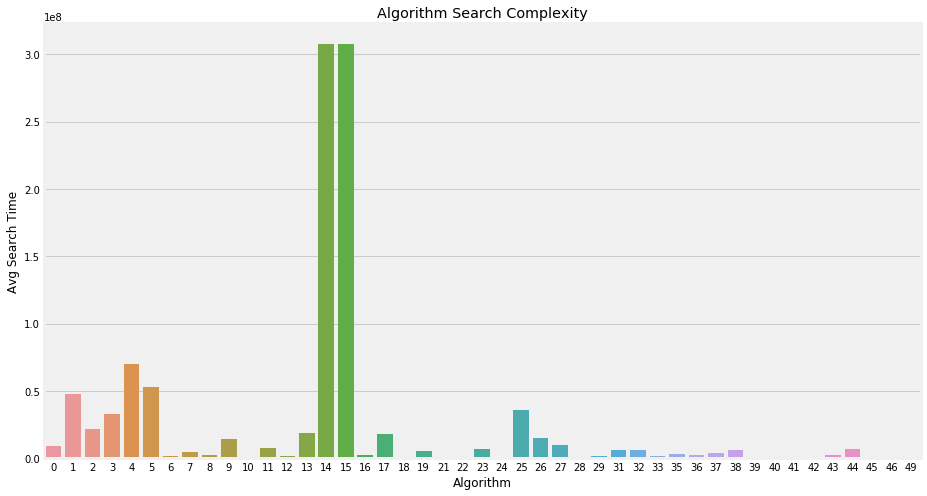

In [28]:
plt.figure(figsize=(14, 8))
plt.title('Algorithm Search Complexity')
sns.barplot(x=df.index, y=df.Complexity)
plt.ylabel('Avg Search Time')
plt.xlabel('Algorithm')
plt.show()

In [29]:
df.Complexity.values[1] / df.Complexity.values[2]

2.218750000156109

## Heurstic Time Benchmark

In [42]:
import time

In [43]:
stats = [[], [], [], []]
for i, func in enumerate([h.h1, h.h2, h.h3, h.h1_mod]):
    for state in np.load('Data/states.npy'):
        start = time.time()
        func(state)
        end = time.time() - start
        stats[i].append(end)

In [56]:
df = pd.DataFrame(list(zip(stats[0], stats[1], 
                           stats[2], stats[3])),
                           columns = ['h1', 'h2', 'h3', 'h1_m'])
df = df.mean()

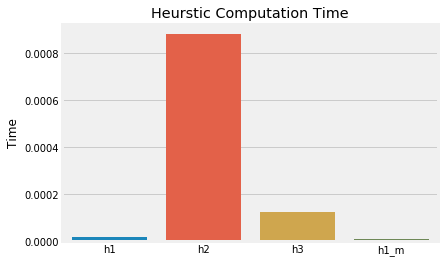

In [59]:
plt.title('Heurstic Computation Time')
plt.ylabel('Time')
sns.barplot(df.index, df.values)